In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [6]:
x_train = train_path = 'data train'
x_test = test_path = 'data test'

In [7]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')


Found 73 images belonging to 7 classes.
Found 21 images belonging to 7 classes.


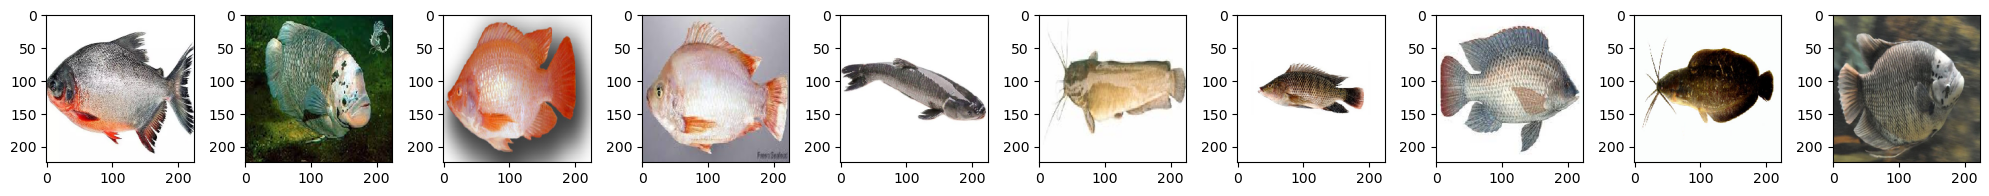

In [8]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [9]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=7, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [10]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
                    validation_data=test_batches, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 3s 268ms/step - loss: 2.0468 - accuracy: 0.1781 - val_loss: 1.9234 - val_accuracy: 0.1429
Epoch 2/15
8/8 [==============================] - 2s 241ms/step - loss: 1.9023 - accuracy: 0.1781 - val_loss: 1.9097 - val_accuracy: 0.1429
Epoch 3/15
8/8 [==============================] - 2s 251ms/step - loss: 1.8798 - accuracy: 0.2055 - val_loss: 1.8803 - val_accuracy: 0.1905
Epoch 4/15
8/8 [==============================] - 2s 239ms/step - loss: 1.8574 - accuracy: 0.2466 - val_loss: 1.8715 - val_accuracy: 0.1429
Epoch 5/15
8/8 [==============================] - 2s 255ms/step - loss: 1.7997 - accuracy: 0.2877 - val_loss: 1.8137 - val_accuracy: 0.2857
Epoch 6/15
8/8 [==============================] - 2s 257ms/step - loss: 1.6518 - accuracy: 0.4247 - val_loss: 1.5873 - val_accuracy: 0.5238
Epoch 7/15
8/8 [==============================] - 2s 253ms/step - loss: 1.3260 - accuracy: 0.5479 - val_loss: 1.2367 - val_accuracy: 0.5714
Epoch 8/15
8/8 [====

In [11]:
model.save('fish.h5')

In [12]:
classify = load_model('fish.h5')
dic = train_batches.class_indices
dic

{'ca chep': 0,
 'ca chim': 1,
 'ca dieu hong': 2,
 'ca loc': 3,
 'ca ro': 4,
 'ca tai tuong': 5,
 'ca tre': 6}

1/1 [==============================] - 0s 22ms/step
fish Classification Result: ['ca dieu hong']


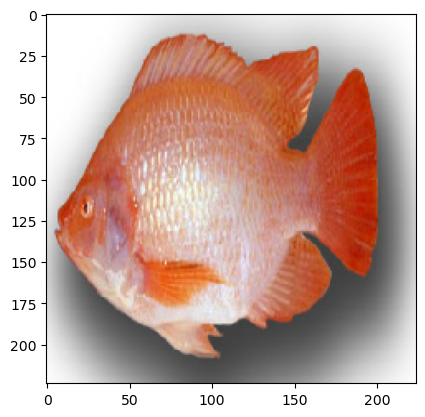

In [16]:
sample = load_img('cadieuhong.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('fish Classification Result:', key)